<a href="https://colab.research.google.com/github/Schollera/MAT421/blob/main/MAT421_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sohan Chollera

MAT421 HW#3

Due Date: 2/2/2025

**Example One regarding Lagrange Polynomial Interpolation**

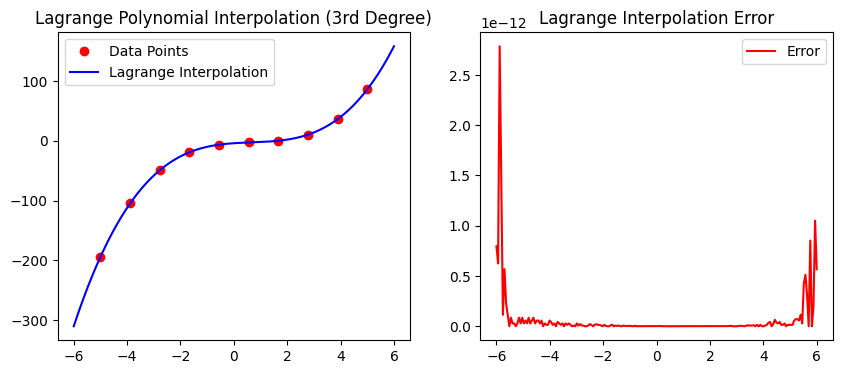

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange(x_vals, y_vals, x):
    def basis(j):
        p = [(x - x_vals[m]) / (x_vals[j] - x_vals[m]) for m in range(len(x_vals)) if m != j]
        return np.prod(p, axis=0)
    return sum(y_vals[j] * basis(j) for j in range(len(x_vals)))
#Dataset values
x_vals = np.linspace(-5, 5, 10)  #Points -5 to 5
y_vals = x_vals**3 - 2*x_vals**2 + 3*x_vals - 4  # 3rd degree polynomial

#Range
x_range = np.linspace(-6, 6, 200)
y_actual = x_range**3 - 2*x_range**2 + 3*x_range - 4  #True function
y_interp = np.array([lagrange(x_vals, y_vals, x) for x in x_range])

#Error
error_1 = np.abs(y_actual - y_interp)

# Plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, 'ro', label="Data Points")
plt.plot(x_range, y_interp, 'b-', label="Lagrange Interpolation")
plt.legend()
plt.title("Lagrange Polynomial Interpolation (3rd Degree)")

plt.subplot(1, 2, 2)
plt.plot(x_range, error_1, 'r-', label="Error")
plt.title("Lagrange Interpolation Error")
plt.legend()
plt.show()

**Example Two regarding Newton's Polynomial Interpolation**

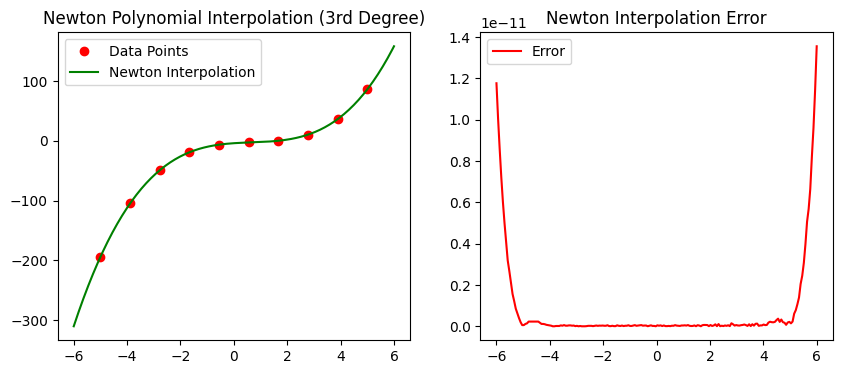

In [12]:
def differences (x_vals, y_vals):
    n = len(x_vals)
    coef = np.array(y_vals, dtype=float)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j - 1]) / (x_vals[j:n] - x_vals[j - 1])
    return coef

def interpolation(x_vals, y_vals, x):
    coef = differences (x_vals, y_vals)
    n = len(x_vals)
    polynomial = coef[0]
    term = 1
    for j in range(1, n):
        term *= (x - x_vals[j - 1])
        polynomial += coef[j] * term
    return polynomial

#Interpolation
y_interp_newton = np.array([interpolation(x_vals, y_vals, x) for x in x_range])

#Error
error_2 = np.abs(y_actual - y_interp_newton)

#Plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, 'ro', label="Data Points")
plt.plot(x_range, y_interp_newton, 'g-', label="Newton Interpolation")
plt.legend()
plt.title("Newton Polynomial Interpolation (3rd Degree)")

plt.subplot(1, 2, 2)
plt.plot(x_range, error_2, 'r-', label="Error")
plt.title("Newton Interpolation Error")
plt.legend()
plt.show()

**Example Three regarding a Comparison of Lagrange vs Newton**

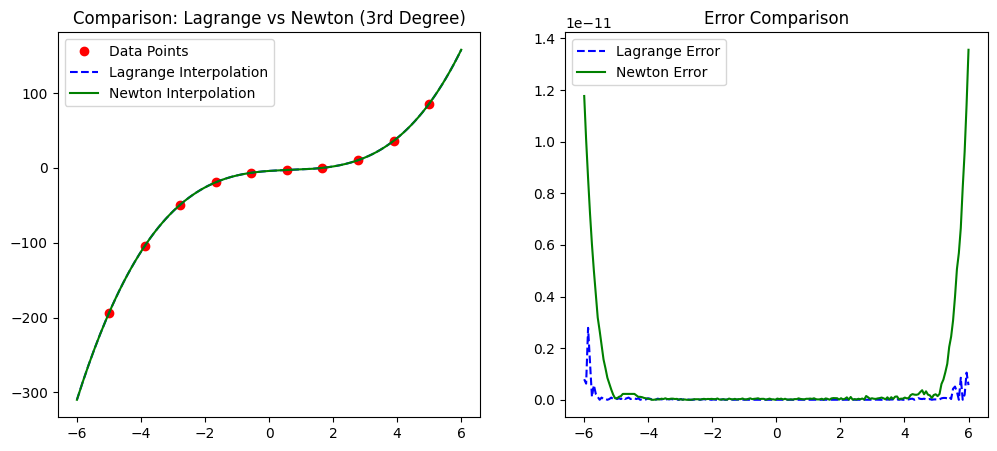

In [13]:
plt.figure(figsize=(12, 5))

#Interpolations
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, 'ro', label="Data Points")
plt.plot(x_range, y_interp, 'b--', label="Lagrange Interpolation")
plt.plot(x_range, y_interp_newton, 'g-', label="Newton Interpolation")
plt.legend()
plt.title("Comparison: Lagrange vs Newton (3rd Degree)")

#Compare Error values
plt.subplot(1, 2, 2)
plt.plot(x_range, error_1, 'b--', label="Lagrange Error")
plt.plot(x_range, error_2, 'g-', label="Newton Error")
plt.legend()
plt.title("Error Comparison")

plt.show()